In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

In [7]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [8]:
#Checing missing values
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [11]:
#Filling missing values in 'oldpeak'
data['oldpeak'].fillna(data['oldpeak'].mean(), inplace=True)

In [12]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [13]:
#convert bool to integer
data['fbs'] = data['fbs'].astype(int)

In [14]:
#converitng all object columns to string to avoid mixed types
for columns in data.columns:
    if data[columns].dtype == 'object':
        data[columns] = data[columns].astype(str)

In [16]:
#Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [18]:
#Rename 'num' to 'target' for clarity
data.rename(columns={'num':'target'}, inplace =True)

In [19]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


In [21]:
#split the dataset into fatures (X) and Target (Y)
X=data.drop(columns=['target']) #features
Y = data['target'] #Target

In [23]:
#split the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3 , random_state=42)

In [25]:
#print the shapes of the split dataset to verify
print("\nTraining features (X_train) shape:", X_train.shape)
print("\nTraining features (X_test) shape:", X_test.shape)
print("\nTraining target (Y_train) shape:", Y_train.shape)
print("\nTraining target (Y_test) shape:", Y_test.shape)


Training features (X_train) shape: (635, 12)

Training features (X_test) shape: (273, 12)

Training target (Y_train) shape: (635,)

Training target (Y_test) shape: (273,)


In [26]:
# Train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
#Evaluate the model
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

Y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

In [29]:
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.50


In [30]:
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70       122
           1       0.44      0.45      0.45        82
           2       0.29      0.24      0.26        34
           3       0.22      0.29      0.25        28
           4       0.00      0.00      0.00         7

    accuracy                           0.50       273
   macro avg       0.33      0.33      0.33       273
weighted avg       0.51      0.50      0.50       273



In [31]:
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Confusion Matrix:
 [[84 23  5  8  2]
 [24 37 11  8  2]
 [ 6  8  8 11  1]
 [ 4 13  2  8  1]
 [ 1  3  2  1  0]]


In [32]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth =None, ccp_alpha = 0.03)
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.03, criterion='entropy')

In [33]:
path = model.cost_complexity_pruning_path(X_train,Y_train)

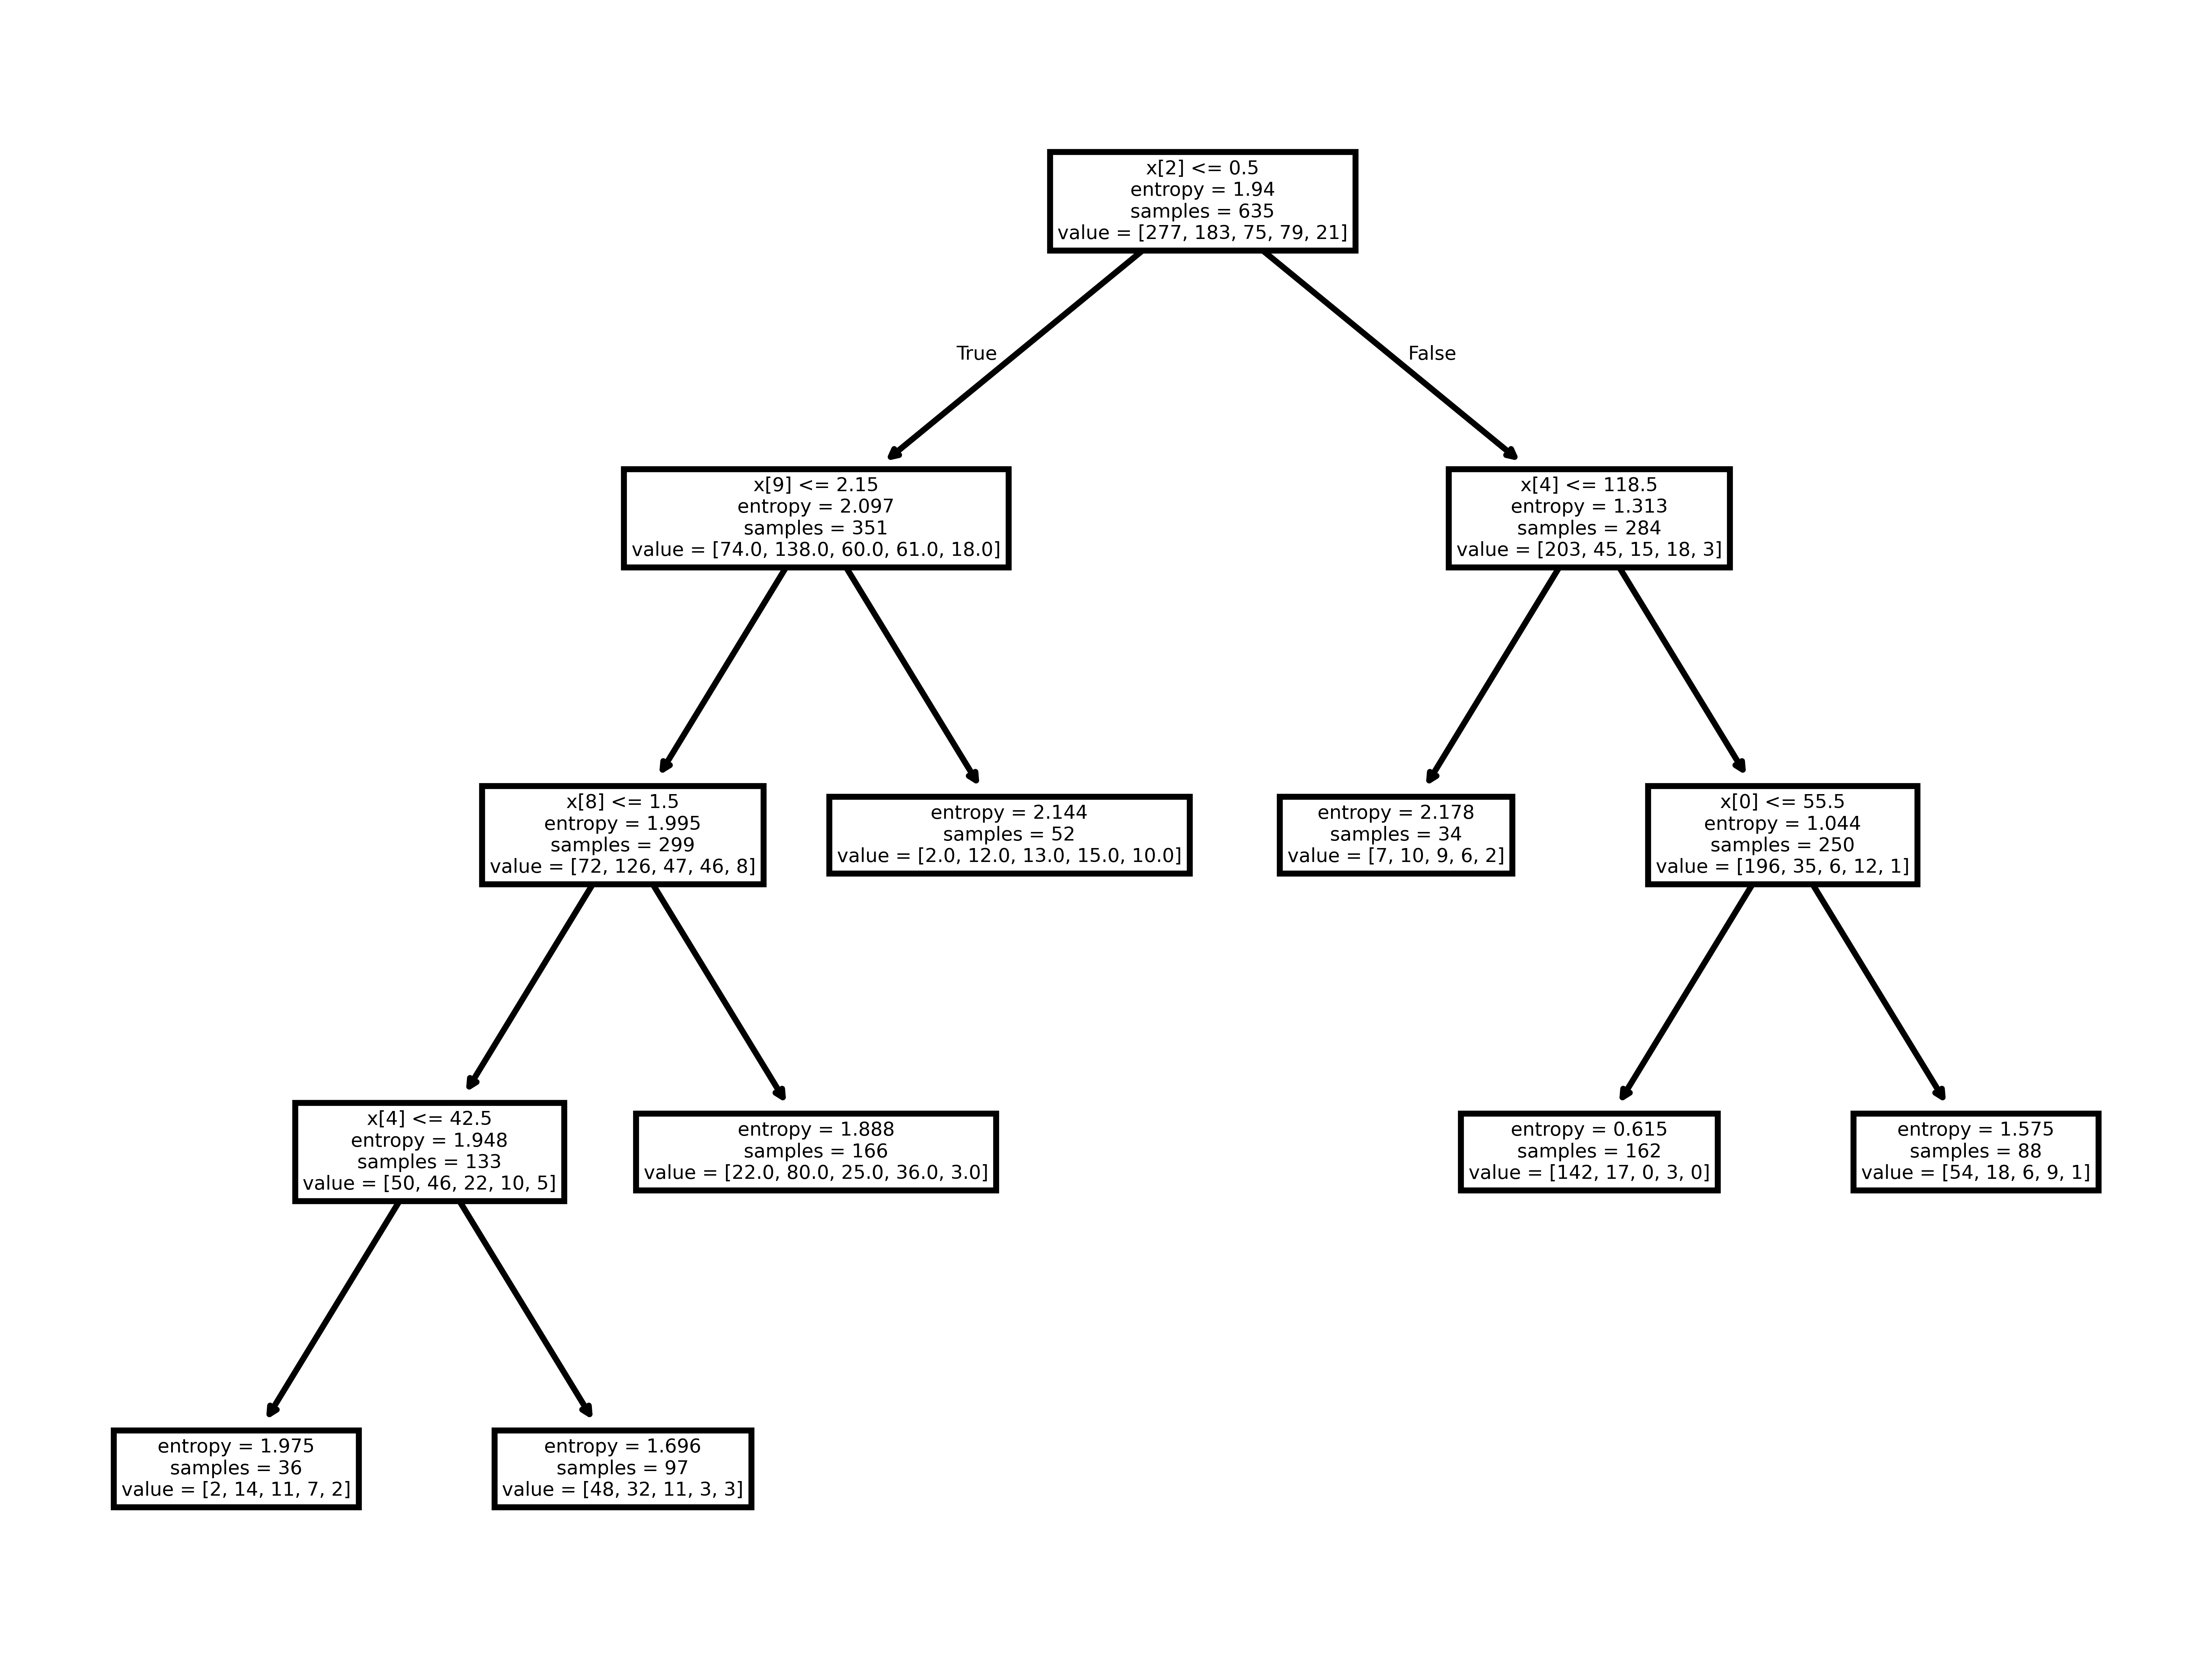

In [35]:
from sklearn import tree

#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);

In [36]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,1,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,1,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,1,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,1,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,3,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,3,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,3,2.500000,0,1,4
906,56,1,2,144,208,1,2,105,2,0.891253,0,0,4


In [37]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set  
preds

array([1, 1, 0, 3, 1, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 1, 0, 1, 0, 1, 0, 3,
       1, 1, 0, 3, 3, 0, 0, 0, 0, 1, 0, 3, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 3, 1, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 3, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 3, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 3], dtype=int64)

In [38]:
pd.Series(preds).value_counts() # getting the count of each category

0    148
1    104
3     21
dtype: int64

In [39]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       122
           1       0.44      0.56      0.49        82
           2       0.00      0.00      0.00        34
           3       0.24      0.18      0.20        28
           4       0.00      0.00      0.00         7

    accuracy                           0.56       273
   macro avg       0.28      0.32      0.29       273
weighted avg       0.47      0.56      0.51       273



C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [40]:
# Prediction on train data

pred_train = model.predict(X_train)
print(classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       277
           1       0.44      0.57      0.50       183
           2       0.00      0.00      0.00        75
           3       0.29      0.19      0.23        79
           4       0.00      0.00      0.00        21

    accuracy                           0.57       635
   macro avg       0.29      0.33      0.30       635
weighted avg       0.47      0.57      0.51       635



C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Here are key hyperparameters in decision tree models, with an overview of their impact on model performance:

- Max Depth (`max_depth`):
  - Specifies the maximum depth of the tree.
  - Effect: Limits the number of levels the tree can grow, which helps control overfitting. A shallow tree (lower max depth) may underfit, while a deeper tree can capture more complex patterns but may overfit on training data.

- Minimum Samples Split (`min_samples_split`):
  - The minimum number of samples required to split a node.
  - Effect: Prevents nodes from splitting when there are too few samples, which helps reduce overfitting. Higher values force nodes to have more samples, often resulting in a more generalized model, while lower values create deeper trees that may overfit.

- Minimum Samples Leaf (`min_samples_leaf`):
  - The minimum number of samples that a leaf node must have.
  - Effect: Similar to `min_samples_split`, it controls overfitting by ensuring that leaf nodes contain a minimum number of samples. Higher values make the model more general, while lower values can lead to overfitting.

- Maximum Features (`max_features`):
  - The number of features to consider when looking for the best split.
  - Effect: Controls feature selection at each split, which can affect model variance and bias. A lower `max_features` can reduce overfitting by making splits less specialized but may increase bias. Higher values reduce bias but increase variance.

- Criterion (`criterion`):
  - The function used to measure the quality of a split, typically `gini` (Gini impurity) or `entropy` (information gain).
  - Effect: Impacts the type of split chosen, which can slightly affect tree structure. Gini is computationally simpler, while entropy may yield a more balanced tree in some cases, but the difference is often minor.

- Max Leaf Nodes (`max_leaf_nodes`):
  - Limits the number of leaf nodes in the tree.
  - Effect: Constrains the growth of the tree, helping to avoid overfitting by preventing too many highly specific leaf nodes. Lower values can lead to underfitting, while higher values can result in overfitting.

2. What is the difference between Label Encoding and One-hot Encoding?

Label Encoding:
- What It Does: Assigns an integer value to each unique category in a feature. For example, "Red" = 0, "Blue" = 1, "Green" = 2.
- Use Case: Best for ordinal features where the categories have an inherent order (e.g., "Low," "Medium," "High").
- Limitations: For non-ordinal categories, it can introduce misleading relationships. Algorithms might interpret higher labels as higher values, which may not be the case.

One-Hot Encoding:
- What It Does: Creates a binary column (0 or 1) for each unique category in a feature. For instance, "Red," "Blue," and "Green" would create three binary columns (one for each color).
- Use Case: Best for nominal features where categories do not have a specific order, and there's no ranking among them.
- Limitations: Can create a large number of columns when there are many unique categories, which may lead to high memory usage and potential computational inefficiency. 

Summary:
- Label Encoding is simple but may mislead some models due to ordinal interpretation.
- One-Hot Encoding is more flexible, especially for non-ordinal data, though it may lead to sparse data with a high number of categories.